In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.cluster import KMeans


%matplotlib inline

In [2]:
import matplotlib as PLT
PLT.rcParams.update({'figure.max_open_warning': 0})
PLT.rcParams.update({'font.size': 15})

PLT.rcParams['axes.linewidth'] = 2

PLT.rcParams['xtick.major.size'] = 3
PLT.rcParams['xtick.major.width'] = 2

PLT.rcParams['ytick.major.size'] = 3
PLT.rcParams['ytick.major.width'] = 2

In [3]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatSign_1/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/StatSign/'

Text(28.5, 0.5, 'samples')

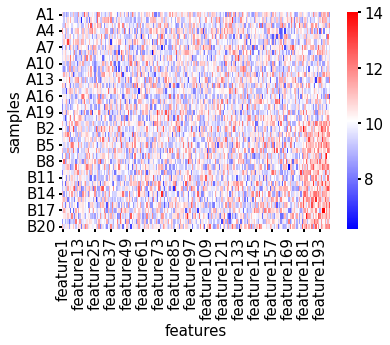

In [4]:
X=pd.read_csv(path+'X200features.csv',index_col=0)
sns.heatmap(X,cmap='bwr')
plt.xlabel('features')
plt.ylabel('samples')


## A,B

In [5]:
X.shape

(40, 200)

In [6]:
K=20
ind=X.index
inda=ind[:K]
indb=ind[K:]

In [7]:
K=20
ind=X.index
inda=ind[:K]
indb=ind[K:]

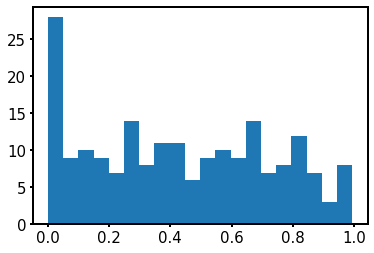

In [8]:
realpv=ttest_ind(X.loc[inda],X.loc[indb],axis=0,equal_var=False)[1]
realpv=pd.Series(realpv,index=X.columns)
plt.hist(realpv,bins=20);

In [9]:
truenumber=np.sum(realpv<0.05)
truenumber

28

In [10]:
#number of simulations
N=10000

nsignfeats=pd.Series(index=np.arange(0,N),dtype=float)
for i in np.arange(0,N):

    ind=permutation(X.index)
    inda=ind[:K]
    indb=ind[K:]
    
    pv=ttest_ind(X.loc[inda],X.loc[indb],axis=0,equal_var=False)[1]

    nsignfeats[i]=np.sum(pv<0.05)

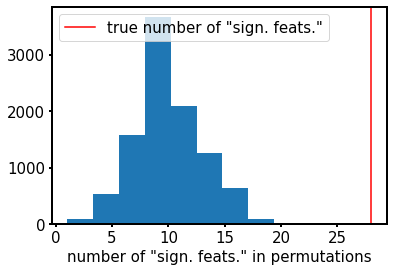

In [11]:
plt.hist(nsignfeats)
plt.axvline(truenumber,color='red',label='true number of "sign. feats."')
plt.xlabel('number of "sign. feats." in permutations')
plt.legend()

proportion of false discoveries

In [12]:
np.mean(nsignfeats)/truenumber

0.3556964285714286

p-value for hypothesis "the number of sign. feats. can be expected by chance with no differences between groups"

In [13]:
np.sum(nsignfeats>=truenumber)/N

0.0

In [14]:
pv_corrected=multipletests(realpv,method='fdr_bh')[1]
pv_corrected=pd.Series(pv_corrected,index=X.columns)
np.sum(pv_corrected<0.35)

29

In [15]:
realpv.index[realpv<0.05]

Index(['feature27', 'feature34', 'feature58', 'feature129', 'feature139',
       'feature145', 'feature162', 'feature175', 'feature181', 'feature182',
       'feature183', 'feature184', 'feature185', 'feature186', 'feature187',
       'feature188', 'feature189', 'feature190', 'feature191', 'feature192',
       'feature193', 'feature194', 'feature195', 'feature196', 'feature197',
       'feature198', 'feature199', 'feature200'],
      dtype='object')

In [16]:
pv_corrected.index[pv_corrected<0.35]

Index(['feature27', 'feature34', 'feature45', 'feature58', 'feature129',
       'feature139', 'feature145', 'feature162', 'feature175', 'feature181',
       'feature182', 'feature183', 'feature184', 'feature185', 'feature186',
       'feature187', 'feature188', 'feature189', 'feature190', 'feature191',
       'feature192', 'feature193', 'feature194', 'feature195', 'feature196',
       'feature197', 'feature198', 'feature199', 'feature200'],
      dtype='object')

Text(0, 0.5, 'pv corrected')

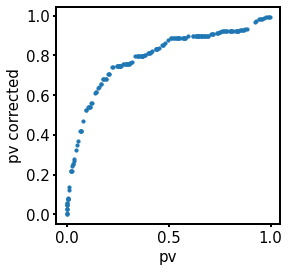

In [17]:
fig=plt.figure(figsize=(4,4))
plt.scatter(realpv,pv_corrected,s=10)
plt.xlabel('pv')
plt.ylabel('pv corrected')

In [18]:
np.max(realpv[pv_corrected<0.35])

0.0505257500561916

## C

In [19]:
np.max(realpv[pv_corrected<0.05])

0.002116029830249201

In [20]:
#number of simulations
N=1000

nsignfeats=pd.Series(index=np.arange(0,N),dtype=float)
for i in np.arange(0,N):

    ind=permutation(X.index)
    inda=ind[:K]
    indb=ind[K:]
    
    pv=ttest_ind(X.loc[inda],X.loc[indb],axis=0,equal_var=False)[1]

    nsignfeats[i]=np.sum(pv<0.00212)

(array([661.,   0., 276.,   0.,   0.,  54.,   0.,   8.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

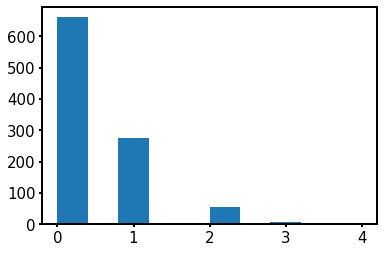

In [21]:
plt.hist(nsignfeats)



In [22]:
truenumber=np.sum(realpv<0.00212)

In [23]:
truenumber

9

In [24]:
np.mean(nsignfeats)/truenumber

0.04577777777777778